![planets](https://exoplanets.nasa.gov/internal_resources/1806)
____
## Wed ICA
____

The goal of today's ICA is to become familiar with some of the tools for dealing with missingness in a dataset. The dataset you will use is the planets dataset, which is easily obtained from Seaborn. 

👉🏻 Your first task is to read the next few cells, where I will get you started. 

Let's first get the dataset and look at what it contains. Do you see any possible issues with missingness? 

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("planets")
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


As I mentioned in the lecture, it is good EDA practice to visualize the missing data in the dataset. Discuss some of the topics below with your group, and perhaps invent some ideas of your own. 

In particular, discuss with your group possible missingness issues. That is, it is clear there is missing data, but what do you think about its missingness? As a reminder: is the data missing in a given column random, or is it grouped? For those columns that are grouped, how are they grouped - is there a pattern? Or, is the missing data in one column correlated with values in another colulmn or missing data in another column? 

👉🏻 Summarize your discussions in a markdown cell. 

<AxesSubplot:>

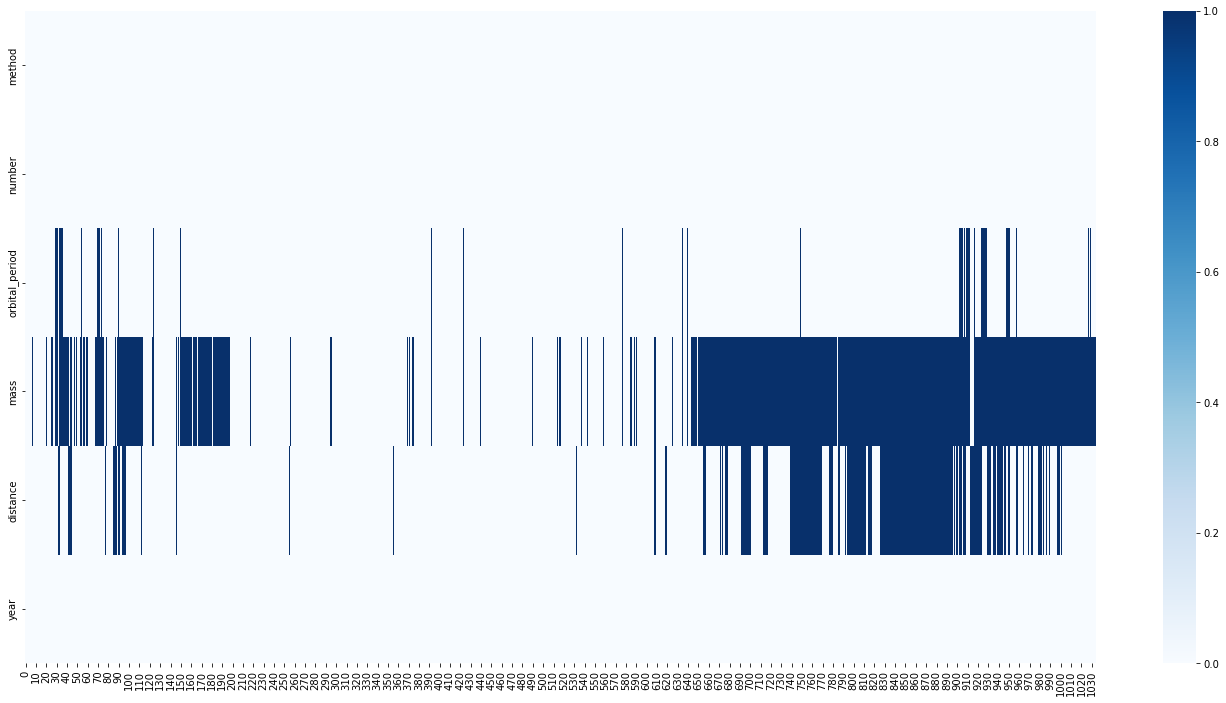

In [106]:
# plt.figure(figsize=(20,4))
plt.figure(figsize=(24,12))
sns.heatmap(df.isna().transpose(), cmap="Blues")
#sns.heatmap(df.isna(), cmap="viridis")
#sns.heatmap(df.isna(), cmap="magma")

✏️ **Answer**:
* Is missingness randon in the column? - The missingness does not seem to be random as it is mainly present in two attributes mass and distance of the dataset. Also, there seems to be some relation between these missing values as they are absent in both the columns simultaneously at many instances. 
* How are they grouped if they are? They might be grouped with missing values in other columns like in distance or with values in other columns like year, method or number.  
* Is data correlated? The data can be correlated to a particular value in other column. For example, most of the missing values seems to be accumulated in one region of the dataset. This might indicate some fault in reading or writing the data. 

Next, we'll make a base heatmap of the correlations and a pairplot. What does Python do with the missing values when we do this? 

👉🏻 Can you find documentation online that tell you what these tools do with missing values? If you can find it, what rule does it use? Could this cause a problem with interpretation? Are these visualizations misleading? 

✏️ **Answer**: 
* In correlation heatmap plot the missing values are assigned to the color of the minimum by default, which infact is not a good practice 
* Pairplot ignores missing/NaN values by default while plotting, and also provides an optional attribute as dropna = T/F while plotting the graph 

<AxesSubplot:>

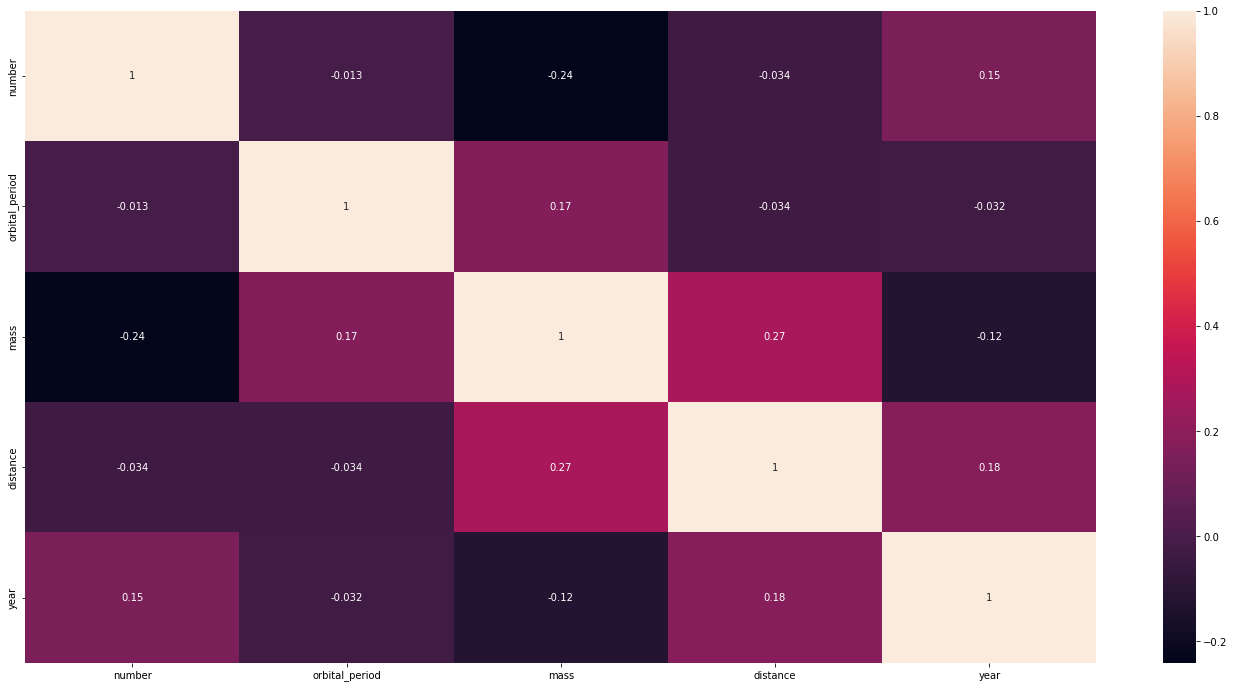

In [107]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(), annot= True)

<Figure size 1728x864 with 0 Axes>

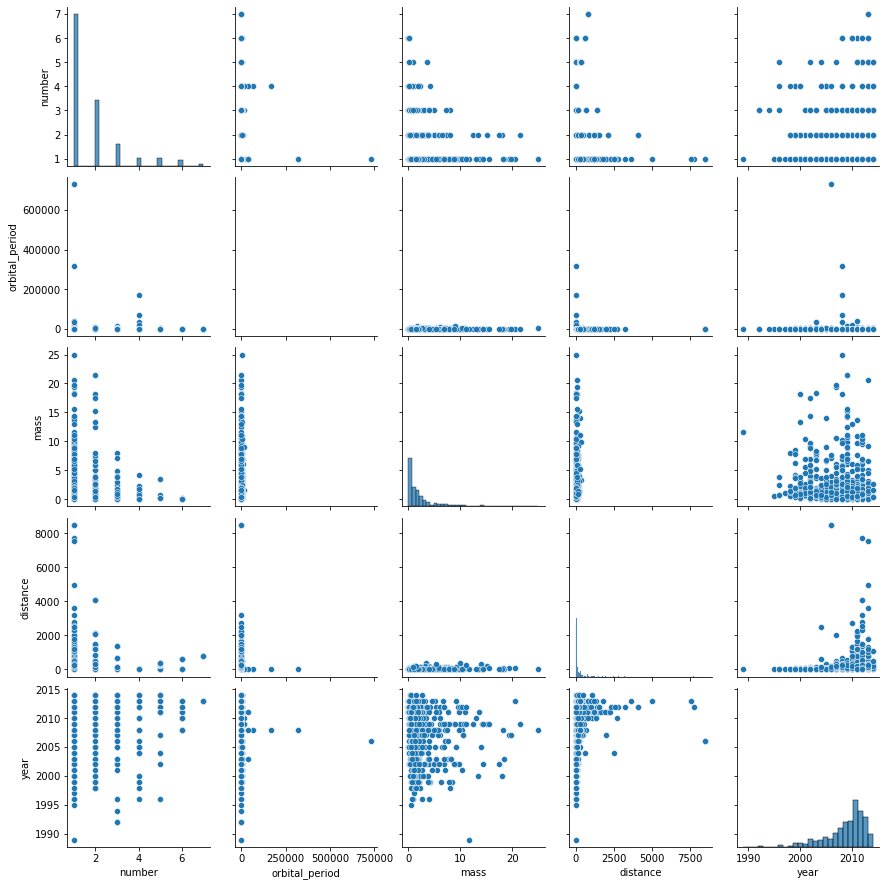

In [108]:
plt.figure(figsize=(24,12))
sns.pairplot(df)

Next, we are going to try to give a bit of an answer to the above question by making a new column in the dataframe that we can use to color code by a column having missing data (or not). 

👉🏻 Discuss the following code with your group members, and create a markdown cell where you explain what each line of code is doing. In the pairplot, why are there no orange points in the row and column with the mass variable? Does the pairplot give you additional insights into missingness? 

Try columns other than "mass". 


✏️ **Answer**
* `df["was_NaN"] = False` creates a new column by name was_NaN and assign False value to all the data points
* `df.loc[df["mass"].isnull() == True, "was_NaN"] = True` the code checks missing values in column mass, if the condition is satified then value in column was_NaN is changed from false to True for that particular row. This is checked for each row in the dataset.
* `df.head(8)` Shows sample data from our dataframe


In [7]:
df1 = df
df1["was_NaN"] = False
df1.loc[df1["mass"].isnull() == True, "was_NaN"] = True
df1.head(8)

,method,number,orbital_period,mass,distance,year,was_NaN
0,Radial Velocity,1,269.300,7.10,77.40,2006,False
1,Radial Velocity,1,874.774,2.21,56.95,2008,False
2,Radial Velocity,1,763.000,2.60,19.84,2011,False
3,Radial Velocity,1,326.030,19.40,110.62,2007,False
4,Radial Velocity,1,516.220,10.50,119.47,2009,False
5,Radial Velocity,1,185.840,4.80,76.39,2008,False
6,Radial Velocity,1,1773.400,4.64,18.15,2002,False
7,Radial Velocity,1,798.500,NaN,21.41,1996,True


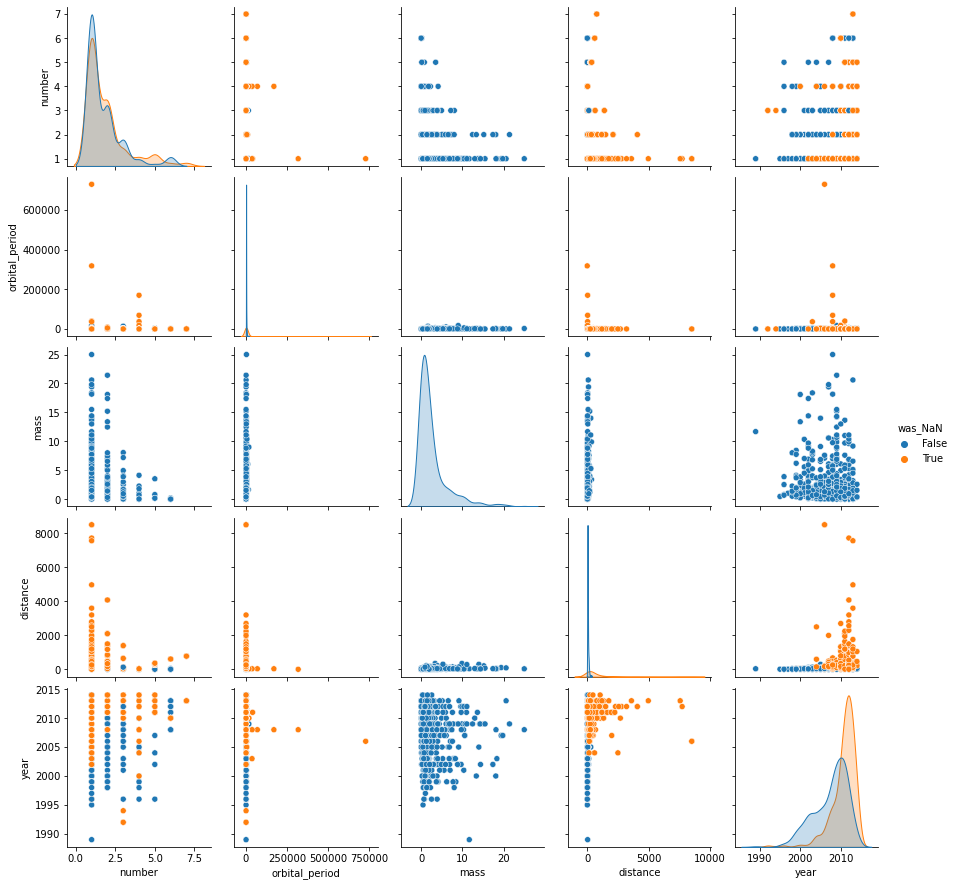

In [8]:
plt.figure(figsize=(24,12))
sns.pairplot(df1, hue="was_NaN")

✏️ **Answer**:
* The reason there is no orange data points in mass column because pairplot does not plot missing values in the graph.  
* Pairplot tells us that most of the missing values in the dataset are from later years, data is missing at a higher rate from year > 2008 
* Thus the graph help us determine relation between missing values in the dataset to values in other columns of the dataset

👉🏻 Discuss this code with your group. What does it do? In particular, are there issues with `sklearn` libraries preferring to use `numpy` arrays rather than `pandas` dataframes? 

📓 Yes, pandas null values dosent work hence np.NaN is used

In [113]:
from sklearn.impute import SimpleImputer
my_imp = SimpleImputer(missing_values=np.NaN)
fixed_df = pd.DataFrame(my_imp.fit_transform(df.drop(columns="method")))
fixed_df.insert(loc=0, column= "method", value= df["method"])
fixed_df.columns = df.columns
fixed_df.index = df.index
fixed_df["was_NaN"] = False
fixed_df.loc[fixed_df[[]].isnull() == True, "was_NaN"] = True
fixed_df.head(10)

,method,number,orbital_period,mass,distance,year,was_NaN
0,Radial Velocity,1.0,269.300,7.100000,77.40,2006.0,False
1,Radial Velocity,1.0,874.774,2.210000,56.95,2008.0,False
2,Radial Velocity,1.0,763.000,2.600000,19.84,2011.0,False
3,Radial Velocity,1.0,326.030,19.400000,110.62,2007.0,False
4,Radial Velocity,1.0,516.220,10.500000,119.47,2009.0,False
5,Radial Velocity,1.0,185.840,4.800000,76.39,2008.0,False
6,Radial Velocity,1.0,1773.400,4.640000,18.15,2002.0,False
7,Radial Velocity,1.0,798.500,2.638161,21.41,1996.0,False
8,Radial Velocity,1.0,993.300,10.300000,73.10,2008.0,False
9,Radial Velocity,2.0,452.800,1.990000,74.79,2010.0,False


✏️ **Answer**:
* `SimpleImputer(missing_values = np.NaN)` creates an imputer that is used to treat missing values, by default it computes mean as the imputed value
* `fixed_df = pd.DataFrame(my_imp.fit_transform(df.drop(columns="method")))` fits the imputer on data and then tranforms it

Next, you are on your own to explore. Show us what you can do! 

One basic idea is to examine the new dataframe to see what `SimpleImputer` did. For example, to get you started, we can look at the correlations with the new dataframe. [Try different options](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) in `SimpleImputer` as well as other imputers. You can also make a new pairplot. 

For example, does yoru conclusion about the correlations in the data change after you have imputed? Can you connect with missingness types?

👉🏻  Either open a markdown cell to describe your findings, or put really good titles on your plots so that Vicente can figure out what you did!

<AxesSubplot:>

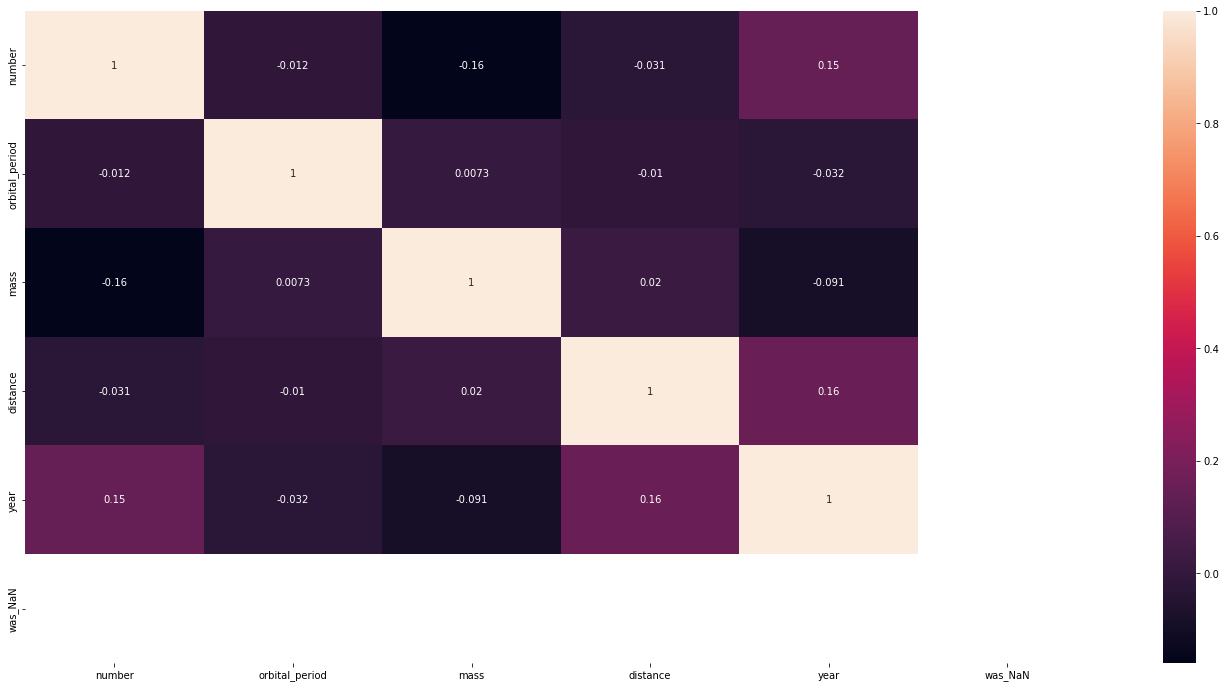

In [114]:
plt.figure(figsize=(24,12))
sns.heatmap(fixed_df.corr(), annot= True)

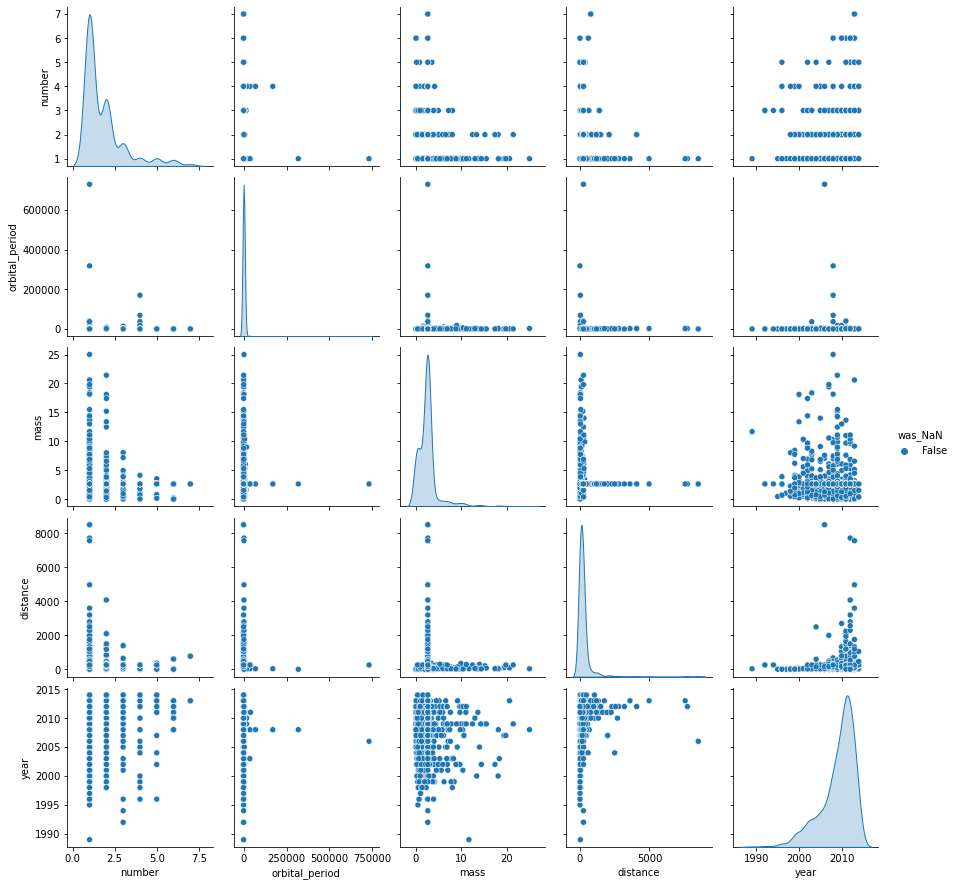

In [115]:
sns.pairplot(fixed_df, hue= "was_NaN")

<AxesSubplot:>

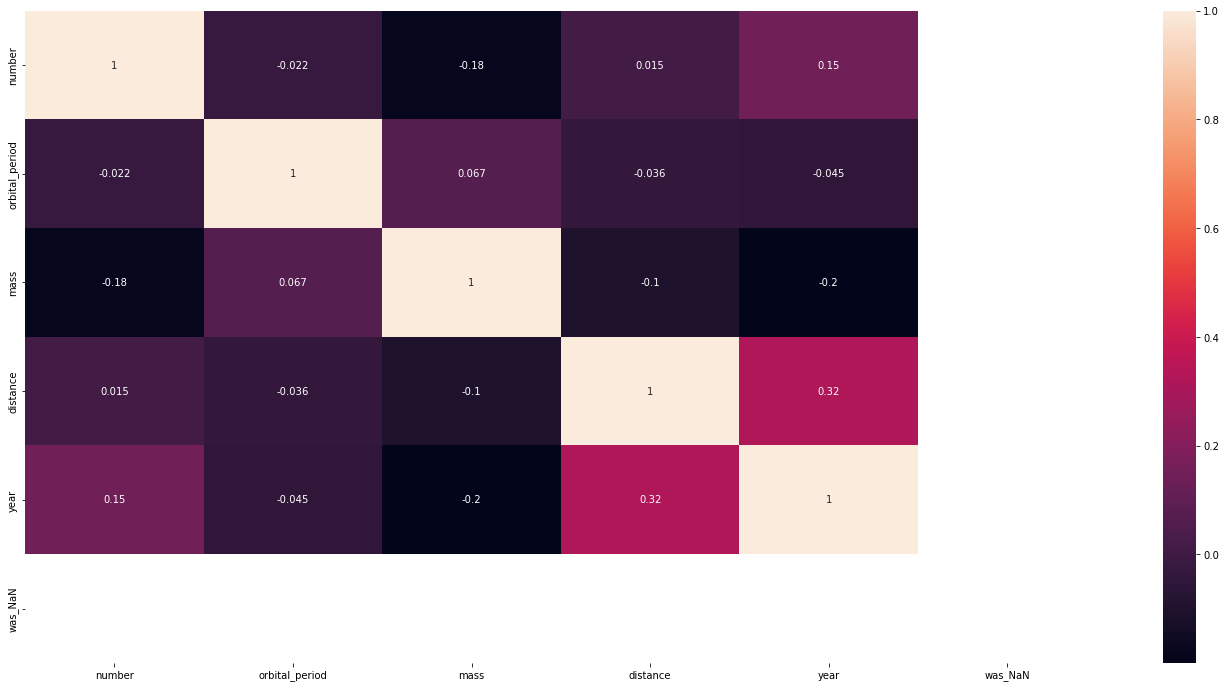

In [117]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 5)
fixed_df1 = pd.DataFrame(imputer.fit_transform(df.drop(columns="method")))
fixed_df1.insert(loc=0, column= "method", value= df["method"])
fixed_df1.columns = df.columns
fixed_df1.index = df.index
fixed_df1["was_NaN"] = False
fixed_df1.loc[fixed_df1[[]].isnull() == True, "was_NaN"] = True
plt.figure(figsize=(24,12))
sns.heatmap(fixed_df1.corr(), annot= True)

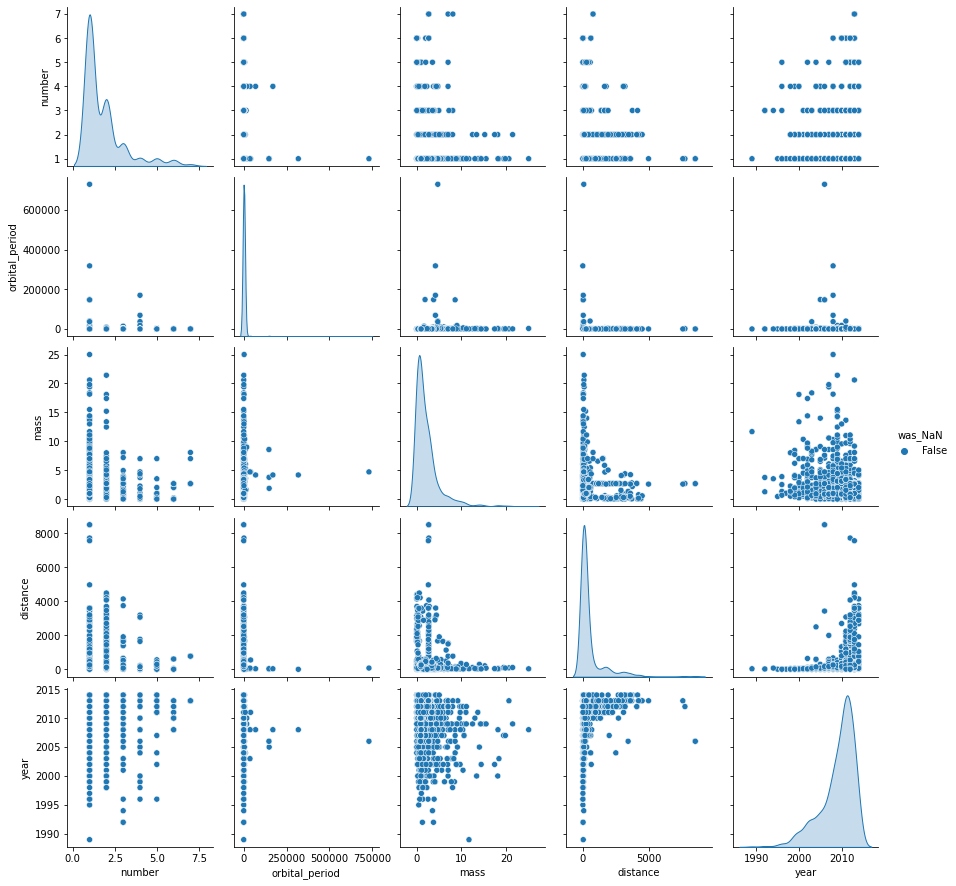

In [118]:
sns.pairplot(fixed_df1, hue= "was_NaN")

✏️ **Answer**:
* There are changes in correlations like distance and method corr values have changed.
* When KNN imputer used we see more changes in the heatmap values of the attributes.
* Even in pair plot there are visual changes in the density of graph at some point, like in distance vs year graph, points are more spread in KNN Imputer method.
* As clearly visible through scatter plot, the difference between mean imputation and KNN imputation. KNN Imputation seems more real and unbiased.
* My conclusion to correlation does changes a bit after the analysis, the missing values are correlated to data in other column i.e. year. 

____
## Fri ICA
____

In this ICA you will make six heatmaps - that's it! 

What you will do is make three fake datasets and make two heatmaps for each:
* one that shows the structure of missing data,
* another that shows correlations. 

You have already made visualizations like these in the Wed ICA, so there is nothing new here. 

The three datasets you make should have strong missingness characteristics: MCAR, MAR and MNAR. The goals are that you learn how to create data with certain missingness properties and to learn to identify it in visualizations. 

Be sure to use your whiteboards for dicussions and the screens to share your results with others in your group. 

I'll give some quick code to show the basic idea, although you are free to code this any way you wish. This is a small dataset, which is easy to type in: you might want to build something much larger using `range` or `linspace` or anything else; use whatever Python libraries you need. 




In [16]:
my_dict = {'col_1': [3, np.nan, 1, 0], 'col_2': ['a', 'b', np.nan, 'd'], 'col_3': [np.nan, 'x', np.nan, 'z']}
my_df = pd.DataFrame.from_dict(my_dict)

In [17]:
my_df

,col_1,col_2,col_3
0,3.0,a,NaN
1,NaN,b,x
2,1.0,NaN,NaN
3,0.0,d,z


<AxesSubplot:>

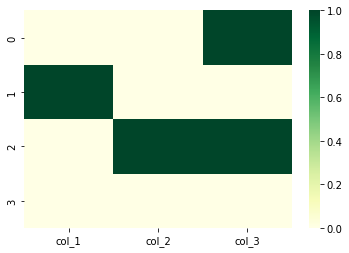

In [18]:
sns.heatmap(my_df.isna(), cmap="YlGn")

<AxesSubplot:>

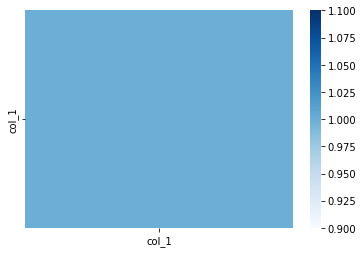

In [19]:
sns.heatmap(my_df.corr(), cmap="Blues")

✏️ **Answer**:
* Process - Creating one sample dataset then creating three dataset from the main dataset
* Flow - Dataset Type creation (MCAR, MAR, MNAR), .describe(), isnull() heatmap and lastly correlation heatmap

In [190]:
# Creating intial dataset
import random
import numpy as np
import missingno as mn

list1 = range(1,100)
string1 = "thisisastringusedtorandomlygeneratevaluesincolumninhopthatallthealphabetsintheenglishhaseencoveredlikepquvwxyz" 
#random.choice(list1)
# random.choices(string1, k = 5)

my_dict = {'col_1': random.choices(list1, k= 500), 'col_2': random.choices(string1, k= 500), 'col_3': random.choices(list1, k=500)
            ,'col_4': random.choices(list1, k=500), 'col_5': random.choices(list1, k=500), 'col_6': random.choices(string1, k= 500)}
my_df = pd.DataFrame.from_dict(my_dict)
my_df.head(5)


,col_1,col_2,col_3,col_4,col_5,col_6
0,80,s,66,66,58,e
1,29,n,88,41,14,t
2,35,w,81,36,73,n
3,86,d,94,6,98,v
4,69,h,22,87,18,n


In [191]:
# Creating dataset for MCAR relation
my_df1 = my_df.replace({'col_1': random.choices(list1, k= 5)}, np.NaN)
my_df1 = my_df1.replace({'col_2': random.choices(string1, k= 5)}, np.NaN)
my_df1 = my_df1.replace({'col_3': random.choices(list1, k= 8)}, np.NaN)
my_df1 = my_df1.replace({'col_4': random.choices(list1, k= 12)}, np.NaN)
my_df1 = my_df1.replace({'col_5': random.choices(list1, k= 4)}, np.NaN)
my_df1.describe()

,col_1,col_3,col_4,col_5
count,474.000000,465.000000,450.000000,483.000000
mean,53.122363,51.498925,49.391111,49.840580
std,29.527459,28.636329,29.873198,29.033273
min,1.000000,1.000000,1.000000,1.000000
25%,26.000000,27.000000,23.250000,25.000000
50%,55.000000,51.000000,50.500000,50.000000
75%,79.000000,77.000000,76.750000,75.000000
max,99.000000,99.000000,99.000000,99.000000


<AxesSubplot:>

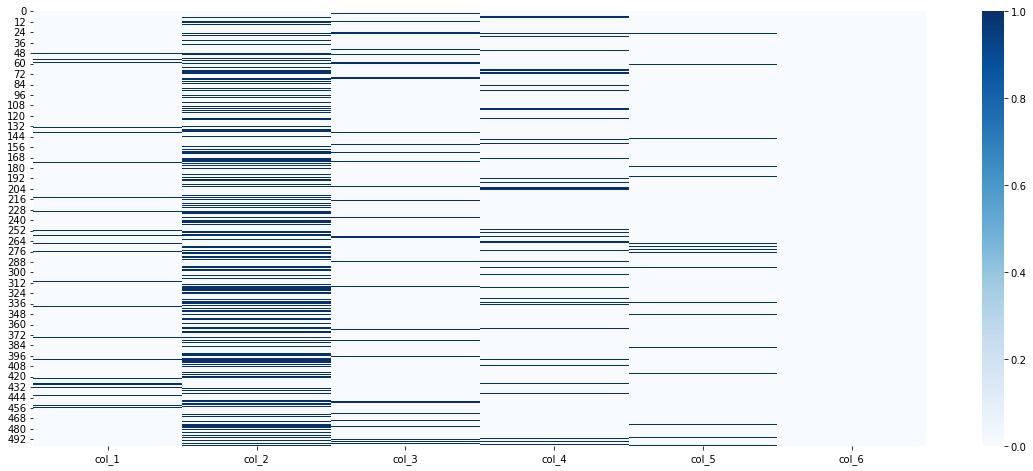

In [192]:
plt.figure(figsize=(20,8))
sns.heatmap(my_df1.isna(), cmap="Blues")

<AxesSubplot:>

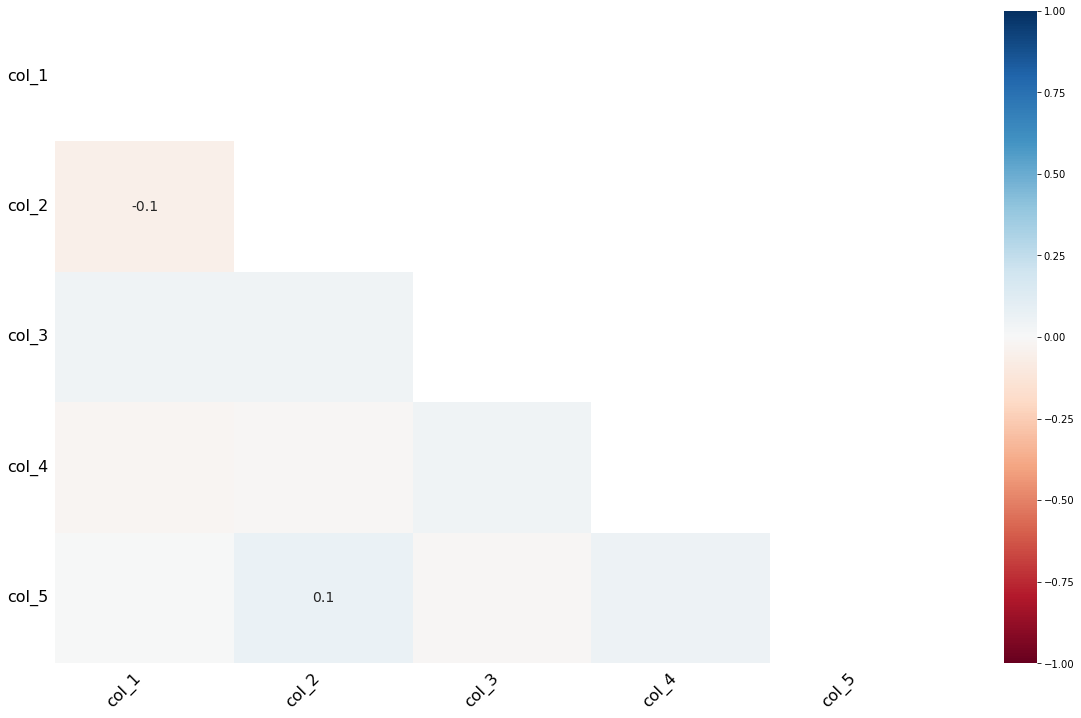

In [193]:
# bar chart 
mn.heatmap(my_df1)

In [194]:
# Creating dataset for MAR
my_df2 = my_df
my_df2 = my_df2.replace({'col_2': random.choices(string1, k= 5)}, np.NaN)
my_df2.loc[my_df2["col_1"] > 30, "col_3"] = np.NaN
# my_df2.loc[my_df2["col_2"] == "x", "col_4"] = np.NaN
# my_df2.loc[my_df2["col_5"] < 55, "col_6"] = np.NaN
# my_df2 = my_df2.replace({'col_4': random.choices(list1, k= 12)}, np.NaN)
# my_df2 = my_df2.replace({'col_5': random.choices(list1, k= 4)}, np.NaN)
my_df2.describe()

,col_1,col_3,col_4,col_5
count,500.000000,153.000000,500.00000,500.000000
mean,52.404000,49.516340,49.16000,49.700000
std,29.420399,29.365685,29.62725,28.950133
min,1.000000,1.000000,1.00000,1.000000
25%,25.750000,22.000000,23.00000,25.000000
50%,54.000000,51.000000,50.50000,50.500000
75%,78.000000,72.000000,76.00000,75.000000
max,99.000000,99.000000,99.00000,99.000000


<AxesSubplot:>

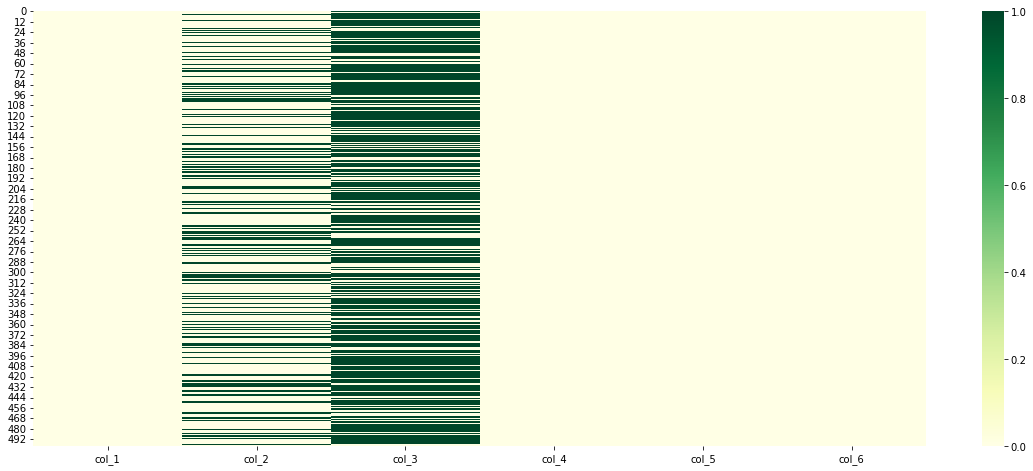

In [195]:
plt.figure(figsize=(20,8))
sns.heatmap(my_df2.isna(), cmap="YlGn")

<AxesSubplot:>

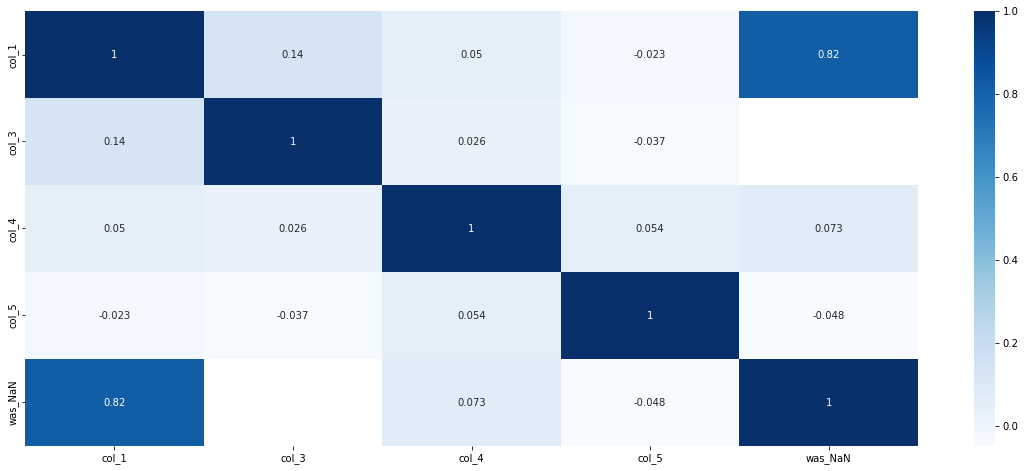

In [196]:
plt.figure(figsize= (20,8))
my_df2["was_NaN"] = False
my_df2.loc[my_df2["col_1"]  > 30, "was_NaN"] = True
sns.heatmap(my_df2.corr(), cmap="Blues", annot=  True)

In [200]:
# Creating dataset for MNAR
my_df3 = my_df
my_df3 = my_df3.replace({'col_1': random.choices(range(1,20), k= 10)}, np.NaN)
my_df3 = my_df3.replace({'col_2': random.choices(string1, k= 2)}, np.NaN)
my_df3 = my_df3.replace({'col_3': random.choices(range(1,30), k= 15)}, np.NaN).sample(frac= 0.24)
my_df3 = my_df3.rename({"col_1":"Age","col_2":"First_letter_Name","col_3":"IQ"}, axis='columns')
my_df3.describe()

,Age,IQ,col_4,col_5
count,114.000000,106.000000,120.000000,120.000000
mean,57.061404,58.377358,48.608333,51.866667
std,28.364656,25.219967,30.199420,27.718250
min,2.000000,1.000000,1.000000,3.000000
25%,32.250000,39.250000,20.750000,29.500000
50%,57.500000,61.000000,51.500000,55.500000
75%,83.750000,80.000000,74.250000,74.250000
max,99.000000,99.000000,99.000000,99.000000


<AxesSubplot:>

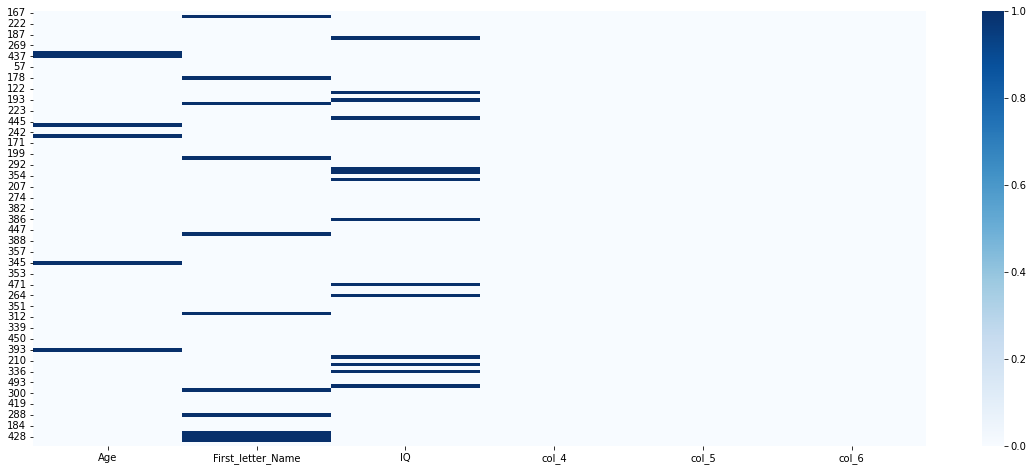

In [201]:
plt.figure(figsize=(20,8))
sns.heatmap(my_df3.isna(), cmap="Blues")

<AxesSubplot:>

<Figure size 1440x576 with 0 Axes>

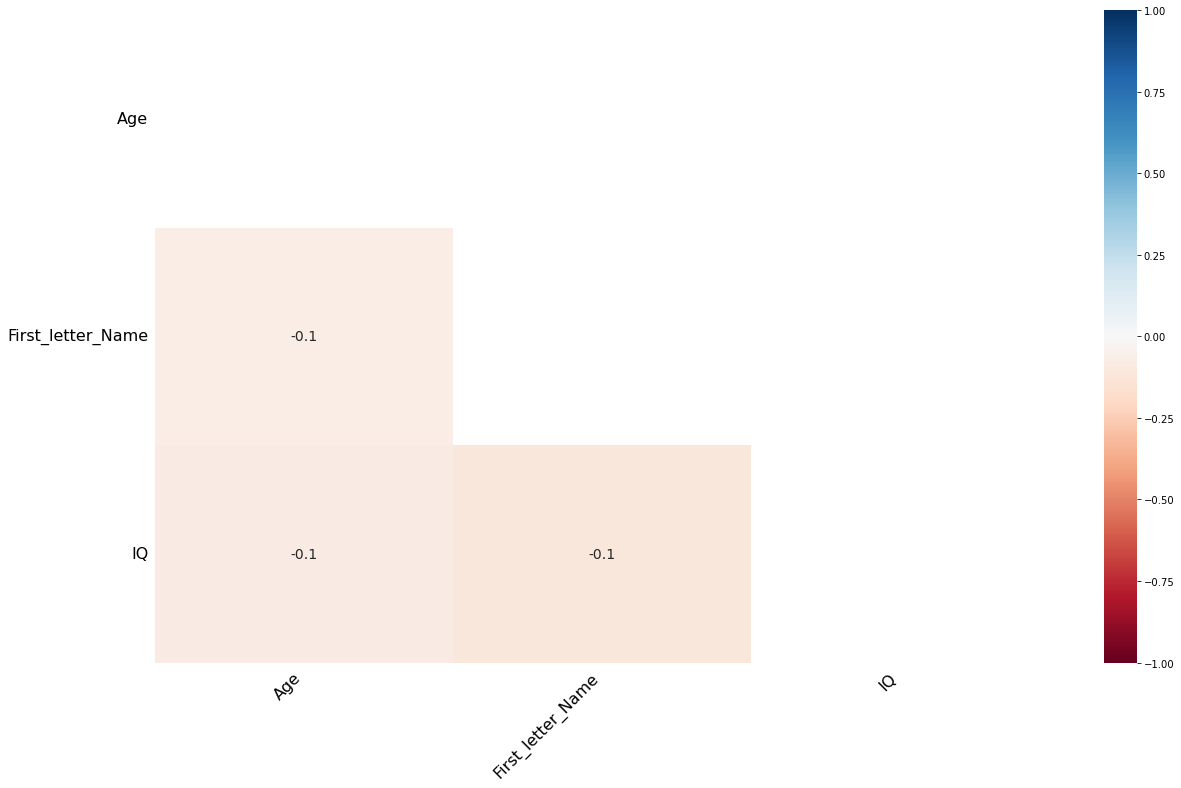

In [202]:
plt.figure(figsize=(20,8))
mn.heatmap(my_df3)